In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def rect(x):
    return np.where(np.abs(x) < 1/2, 1, 0)

In [6]:
pix_size = 1.0e-6
width = 100
height = 100
z = 1.0e-3
wavelength = 633.0e-9
k = 2 * np.pi / wavelength

data = np.loadtxt("../Questions/data/5.csv")
pad_width = math.ceil(data.shape[1]/2)
pad_height = math.ceil(data.shape[0]/2)
padded = np.pad(data, [[pad_height, pad_height],[pad_width, pad_width]])
padded_width = padded.shape[1]
padded_height = padded.shape[0]

Text(0.5, 1.0, '1.0 mm')

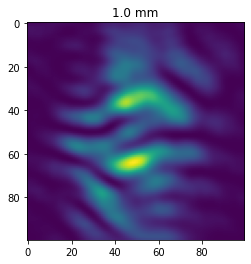

In [7]:
fft_image = np.fft.fft2(padded)
u = np.fft.fftfreq(padded_width, pix_size)
v = np.fft.fftfreq(padded_height, pix_size)
UU, VV = np.meshgrid(u, v)
w = np.where(UU**2 + VV**2 <= 1/wavelength**2, np.sqrt(1/wavelength**2 - UU**2 - VV**2), 0)
h = np.exp(1.0j * 2.0*np.pi * w * z)
du = 1.0/(padded_width * pix_size)
dv = 1.0/(padded_height * pix_size)
u_lim = 1.0/(wavelength * np.sqrt((2.0 * du * z)**2 + 1.0))
v_lim = 1.0/(wavelength * np.sqrt((2.0 * dv * z)**2 + 1.0))
h_filter = rect(UU/(2*u_lim)) * rect(VV/(2*v_lim))
h_lim = h * h_filter
g = np.fft.ifft2(fft_image * h_lim)
I = np.abs(g)**2/2.0
I_crop = I[pad_height:pad_height + data.shape[0], pad_width:pad_width + data.shape[1]]
plt.imshow(I_crop)
plt.title("1.0 mm")